In [43]:
# Package Import
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.ensemble import AdaBoostClassifier

In [5]:
# Reading Data file
dataset = pd.read_csv('train.csv')

In [6]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
# Splitting input and target
X = dataset.iloc[:,0:20]
y = dataset.iloc[:,-1]

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
# Feature Scaling For Train and Test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Fitting Gradient Boosting  Classification to the Train set
clf = AdaBoostClassifier()
clf = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
clf = AdaBoostClassifier(algorithm='SAMME', n_estimators=50, learning_rate=1.0, random_state=0).fit(X_train, y_train)

In [14]:
# Predicting the Test set results
y_test_pred = clf.predict(X_test)

In [15]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)

Confusion Matrix, without normalization
[[41 54  0  0]
 [17 61 14  0]
 [ 0 19 42 38]
 [ 0  0 31 83]]


Normalized confusion matrix
[[0.43157895 0.56842105 0.         0.        ]
 [0.18478261 0.66304348 0.15217391 0.        ]
 [0.         0.19191919 0.42424242 0.38383838]
 [0.         0.         0.27192982 0.72807018]]


<Figure size 432x288 with 0 Axes>

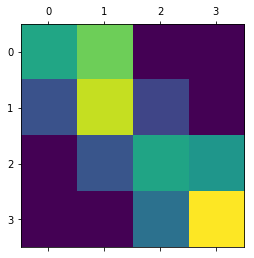

In [16]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [17]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.71      0.43      0.54        95
          1       0.46      0.66      0.54        92
          2       0.48      0.42      0.45        99
          3       0.69      0.73      0.71       114

avg / total       0.59      0.57      0.56       400



In [19]:
####################################Kernel Support Vector Machine###############################################################
# Fitting Kernel SVM to the Validation set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 1, gamma = 0.0001, random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
# Predicting the Test set results
y_test_pred = classifier.predict(X_test)

Confusion Matrix, without normalization
[[ 93   2   0   0]
 [  3  86   3   0]
 [  0   5  89   5]
 [  0   0   1 113]]


<Figure size 720x504 with 0 Axes>

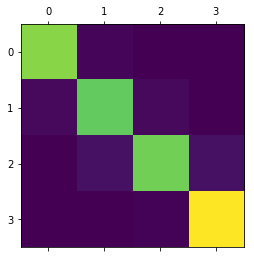

In [21]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)

In [22]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        95
          1       0.92      0.93      0.93        92
          2       0.96      0.90      0.93        99
          3       0.96      0.99      0.97       114

avg / total       0.95      0.95      0.95       400



In [25]:
######################################### Naive Bayes ##########################################################################
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [26]:
# Predicting the Test set results
y_test_pred = classifier.predict(X_test)

Confusion Matrix, without normalization
[[ 89   6   0   0]
 [  4  69  19   0]
 [  0  16  70  13]
 [  0   0   8 106]]


<Figure size 720x504 with 0 Axes>

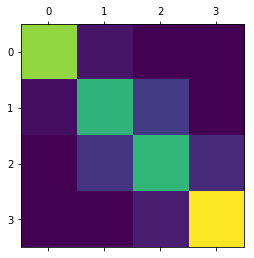

In [27]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)

Normalized confusion matrix
[[0.93684211 0.06315789 0.         0.        ]
 [0.04347826 0.75       0.20652174 0.        ]
 [0.         0.16161616 0.70707071 0.13131313]
 [0.         0.         0.07017544 0.92982456]]


<Figure size 432x288 with 0 Axes>

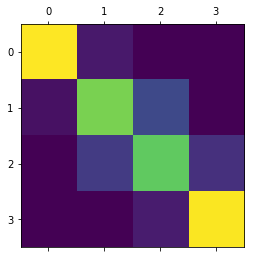

In [28]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [29]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        95
          1       0.76      0.75      0.75        92
          2       0.72      0.71      0.71        99
          3       0.89      0.93      0.91       114

avg / total       0.83      0.83      0.83       400



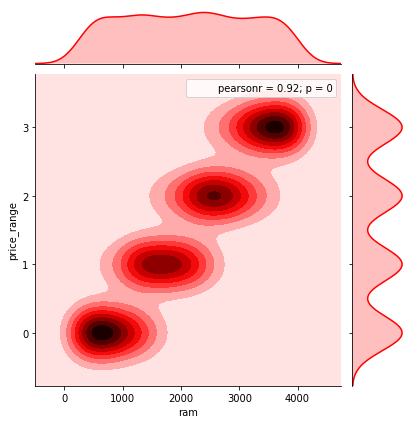

In [40]:
#####RAM with Price Range
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

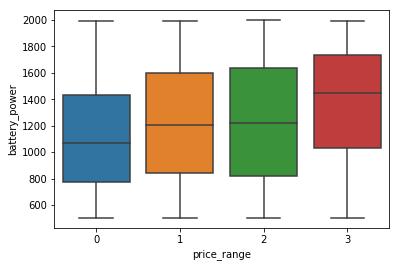

In [47]:
###Battery Power with Price Range
sns.boxplot(x="price_range", y="battery_power", data=dataset)

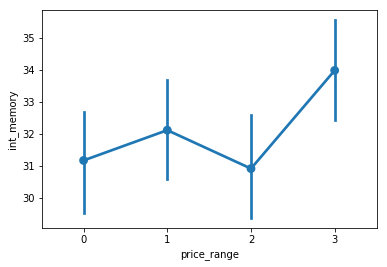

In [48]:
####Internal Memory with Price Range
sns.pointplot(y="int_memory", x="price_range", data=dataset)